<a href="https://colab.research.google.com/github/nico-carri/challenge-telecomX-alura/blob/main/Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alura LATAM - Challenge Telecom X

##📌 Extracción(E - Extract)

In [ ]:
# importo las librerias que voy a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# luego gnenero un dataframe del archivo json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos = pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# hago una revisión general del dataframe

# Tamaño del dataset
print("Shape:", datos.shape)

# Información general de tipos y nulos
datos.info()

# Ver si hay columnas con strings que deberían ser numéricas
print(datos.dtypes)

# Descripción estadística
datos.describe()


Shape: (7267, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
# Normalizo cada columna de diccionarios
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

In [ ]:
# Concateno todo junto con las columnas que ya estaban normalizadas
df_final = pd.concat([
    datos[['customerID', 'Churn']].reset_index(drop=True),
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Veo las primeras filas
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Ahora resivo los datos
df_final.info()
df_final.describe()
df_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


##🔧 Transformación

In [ ]:
# Cambio el tipo de dato en Charges de object a float
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Imprimo el total de nulos, en este caso son 11, ya que al ser float ahora si se reconocen valores determinados valores como nulos.
print(df_final['Charges.Total'].isnull().sum())

11


In [ ]:
# Relleno los nulos con 0s
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)


In [ ]:
# Columnas que tienen valores "Yes"/"No" u otros similares que queremos binarizar
colms_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Función robusta para binarizar
def binarizar_yes_no(df, columnas):
    df = df.copy()
    for col in columnas:
        # Normaliza a minúsculas y limpia espacios
        df[col] = df[col].astype(str).str.strip().str.lower()

        # Reemplaza valores por 1 y 0
        df[col] = df[col].replace({
            'yes': 1,
            'no': 0,
            'no internet service': 0,
            'no phone service': 0,
            '': np.nan
        })

        # Convierte NaNs a 0 y castea a int
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    return df

# Aplicás la función correctamente
df_final = binarizar_yes_no(df_final, colms_binarias)

# Verificás tipos
print(df_final[colms_binarias].dtypes)




Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
dtype: object


<ipython-input-10-a9573e54d63a>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({
<ipython-input-10-a9573e54d63a>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({
<ipython-input-10-a9573e54d63a>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

In [ ]:
print(df_final.dtypes)


customerID           object
Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


##📊 Carga y análisis

In [ ]:
# Primero traducimos los valores del dataframe
df_final['Contract'] = df_final['Contract'].replace({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
})

df_final['TechSupport'] = df_final['TechSupport'].replace({
    'Yes': 'Sí',
    'No': 'No'
})

df_final['PaymentMethod'] = df_final['PaymentMethod'].replace({
    'Mailed check': 'Cheque',
    'Electronic check': 'Cheque elect.',
    'Bank transfer (automatic)': 'Transf. automática',
    'Credit card (automatic)': 'Tarj. automática'
})


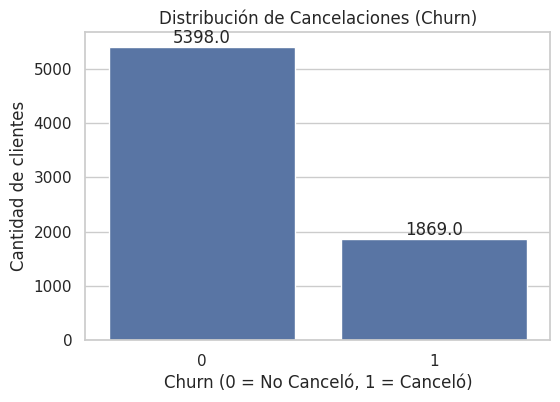

Tasa de cancelación: 25.72%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución de Churn
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_final, x='Churn')
plt.title('Distribución de Cancelaciones (Churn)')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Cantidad de clientes')

# Agregar los números encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

# Porcentaje de cancelaciones
cancel_rate = df_final['Churn'].mean()
print(f'Tasa de cancelación: {cancel_rate:.2%}')

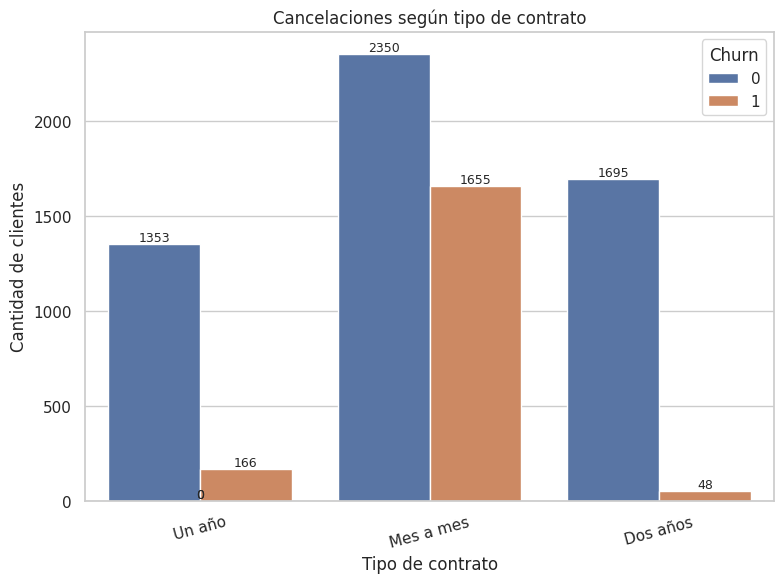

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_final, x='Contract', hue='Churn')
plt.title('Cancelaciones según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)

# Agregar valores arriba de las barras
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


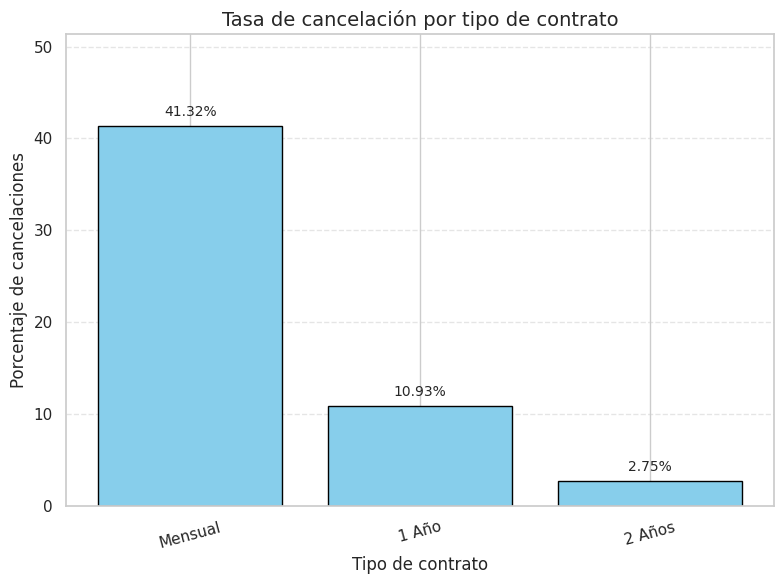

In [ ]:
import matplotlib.pyplot as plt

# Calcular tasas de cancelación en %
tasa_cancelacion = df_final.groupby('Contract')['Churn'].mean().sort_values(ascending=False) * 100

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(tasa_cancelacion.index, tasa_cancelacion.values, color='skyblue', edgecolor='black')

# Agregar porcentaje arriba de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Etiquetas personalizadas para el eje X
ax.set_xticks(range(len(tasa_cancelacion.index)))
ax.set_xticklabels(['Mensual', '1 Año', '2 Años'], rotation=15)

# Configuración del gráfico
ax.set_title('Tasa de cancelación por tipo de contrato', fontsize=14)
ax.set_ylabel('Porcentaje de cancelaciones', fontsize=12)
ax.set_xlabel('Tipo de contrato', fontsize=12)
ax.set_ylim(0, max(tasa_cancelacion) + 10)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# aca separo las variables, me parece mejor asi que tendré que hacer los graficos de nuevo

# Clientes que se fueron (churn = 1)
df_churn = df_final[df_final['Churn'] == 1]

# Clientes que se quedaron (churn = 0)
df_no_churn = df_final[df_final['Churn'] == 0]

# Ver cuántos hay en cada grupo
print(f"Clientes que se fueron: {len(df_churn)}")
print(f"Clientes que se quedaron: {len(df_no_churn)}")

# Ejemplo: promedio de gasto mensual en cada grupo
# Promedio de gasto mensual
print("Promedio gasto mensual - clientes que se fueron:", df_churn['Charges.Monthly'].mean())
print("Promedio gasto mensual - clientes que se quedaron:", df_no_churn['Charges.Monthly'].mean())


Clientes que se fueron: 1869
Clientes que se quedaron: 5398
Promedio gasto mensual - clientes que se fueron: 74.44133226324237
Promedio gasto mensual - clientes que se quedaron: 61.35422378658762


<ipython-input-74-7818982bcc0a>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['No', 'Sí'])


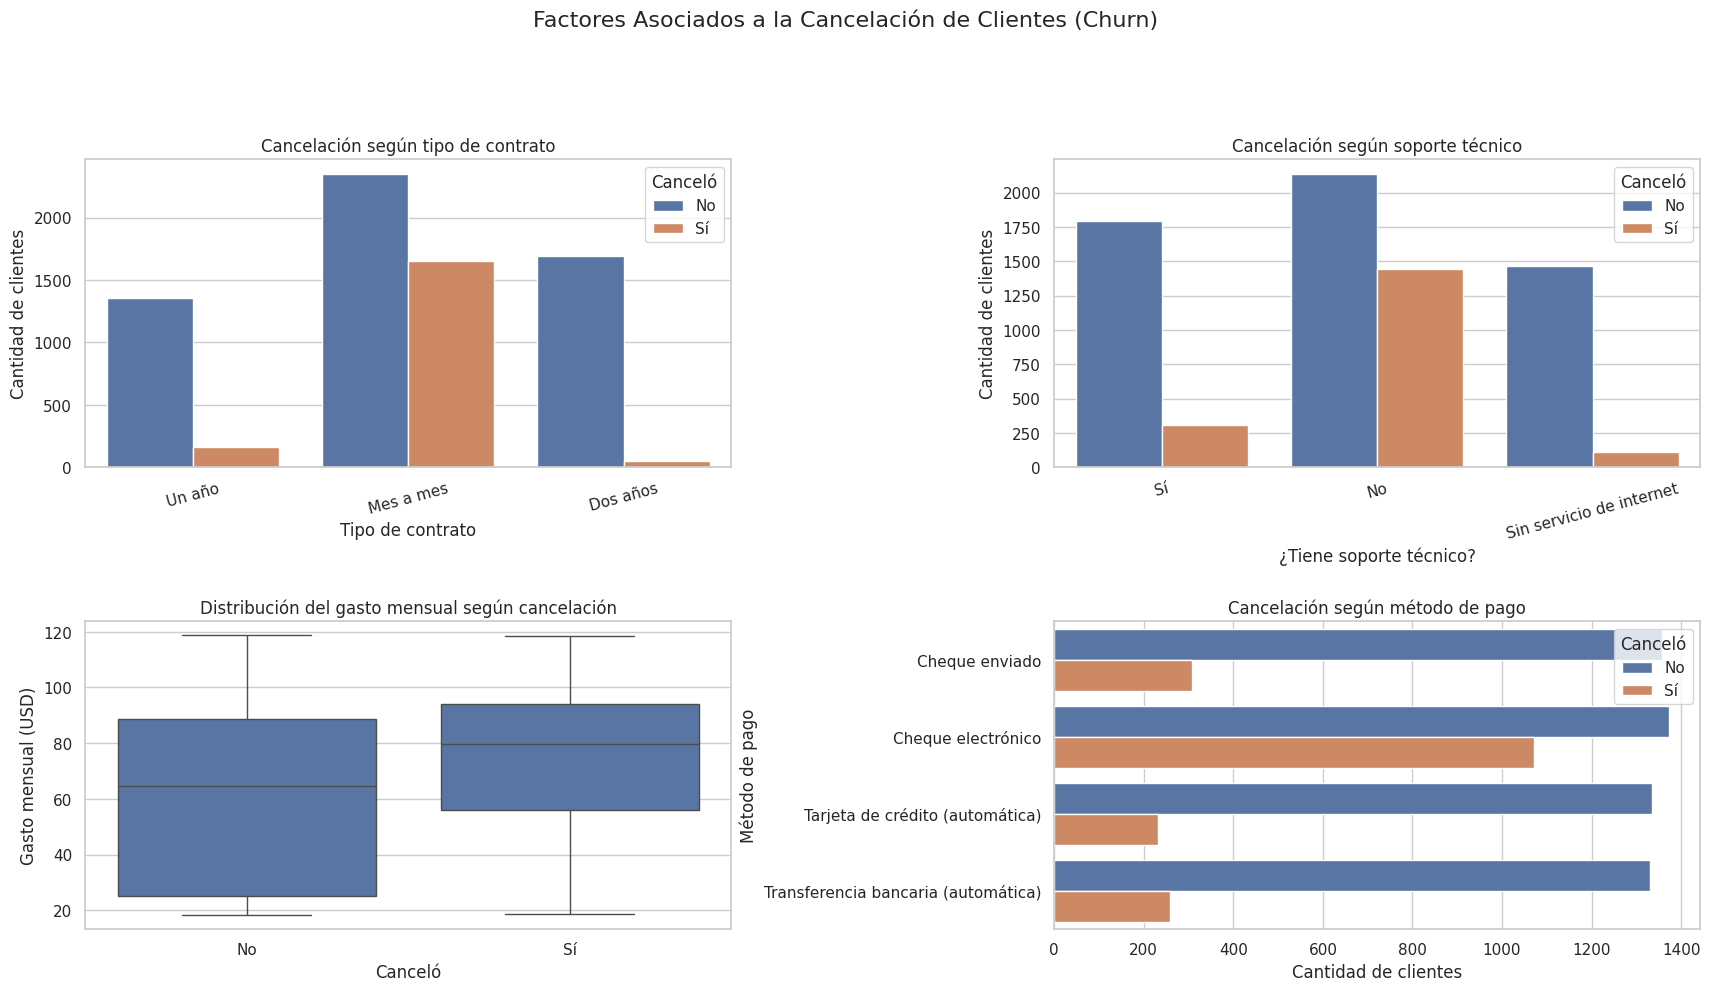

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(19, 10))
fig.suptitle('Factores Asociados a la Cancelación de Clientes (Churn)', fontsize=16, y=1.03)

# 1. Tipo de contrato vs Cancelación
sns.countplot(data=df_final, x='Contract', hue='Churn', ax=axs[0, 0])
axs[0, 0].set_title('Cancelación según tipo de contrato')
axs[0, 0].set_xlabel('Tipo de contrato')
axs[0, 0].set_ylabel('Cantidad de clientes')
axs[0, 0].tick_params(axis='x', rotation=15)
axs[0, 0].legend(title='Canceló', labels=['No', 'Sí'])

# 2. Soporte técnico vs Cancelación
sns.countplot(data=df_final, x='TechSupport', hue='Churn', ax=axs[0, 1])
axs[0, 1].set_title('Cancelación según soporte técnico')
axs[0, 1].set_xlabel('¿Tiene soporte técnico?')
axs[0, 1].set_ylabel('Cantidad de clientes')
axs[0, 1].tick_params(axis='x', rotation=15)
axs[0, 1].legend(title='Canceló', labels=['No', 'Sí'])

# 3. Gasto mensual (boxplot)
sns.boxplot(data=df_final, x='Churn', y='Charges.Monthly', ax=axs[1, 0])
axs[1, 0].set_title('Distribución del gasto mensual según cancelación')
axs[1, 0].set_xlabel('Canceló')
axs[1, 0].set_ylabel('Gasto mensual (USD)')
axs[1, 0].set_xticklabels(['No', 'Sí'])

# 4. Método de pago vs Cancelación
sns.countplot(data=df_final, y='PaymentMethod', hue='Churn', ax=axs[1, 1])
axs[1, 1].set_title('Cancelación según método de pago')
axs[1, 1].set_xlabel('Cantidad de clientes')
axs[1, 1].set_ylabel('Método de pago')
axs[1, 1].legend(title='Canceló', labels=['No', 'Sí'])
axs[1, 1].tick_params(axis='y', rotation=0)

# Ajuste de espacios para evitar superposición
plt.subplots_adjust(hspace=0.5, wspace=0.5, left=0.10, right=0.95)
plt.show()


##📄 Informe final

##1. Objetivo del análisis
El presente informe tiene como objetivo identificar factores asociados a la cancelación del servicio por parte de los clientes (churn), para generar estrategias que reduzcan este comportamiento.

##2. Metodología
Se utilizó un dataset de clientes que incluye variables como tipo de contrato, método de pago, soporte técnico, gasto mensual y si el cliente canceló o no. Se realizaron análisis exploratorios y visualizaciones con Python (pandas, seaborn y matplotlib).



##3. Principales hallazgos
📌 Tipo de contrato
Los clientes con contrato "Mes a mes" presentan una tasa de cancelación significativamente más alta.

En contraste, aquellos con contratos de un año o dos años tienen una tasa de cancelación baja.

📌 Soporte técnico
Tener soporte técnico reduce visiblemente la cancelación.

Los clientes sin soporte técnico cancelan más, lo que sugiere que este servicio es un factor de retención.

📌 Método de pago
Los métodos de pago automáticos (tarjeta o transferencia) están asociados a menor churn.

Los clientes que pagan con cheque electrónico o cheque enviado cancelan más.

📌 Gasto mensual
El gasto mensual promedio es mayor en los clientes que cancelan.

Esto podría deberse a que los clientes con más servicios o cargos adicionales se sienten menos satisfechos con el costo/beneficio.



##4. Conclusiones y recomendaciones
✅ Conclusiones


 1.  La flexibilidad de contratos cortos (mes a mes) facilita la cancelación.

 2.  Los servicios adicionales como el soporte técnico aumentan la retención.

 3.  Los métodos de pago automáticos podrían contribuir a una experiencia más fluida y menor cancelación.

 4.  El precio o percepción de costo alto podría estar empujando a ciertos clientes a cancelar.


🛠️ Recomendaciones


 *  Fomentar contratos de mayor duración con beneficios o descuentos.
 *  Promover el uso de métodos de pago automáticos con incentivos.
 *  Ofrecer soporte técnico como servicio incluido o en combo.
 *  Revisar la estructura de precios y comunicar mejor el valor de los servicios.

